In [1]:
import psycopg2
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
import matplotlib
import warnings
import yellowbrick as yb

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier

from yellowbrick.classifier import ClassificationReport

warnings.simplefilter(action='ignore', category=FutureWarning)

/Users/lisahuynh/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
conn = psycopg2.connect( 
                        host = 'project.cgxhdwn5zb5t.us-east-1.rds.amazonaws.com',
                        port = 5432, 
                        user = 'postgres',
                        password = 'Admin123',
                        database = 'postgres')
cursor = conn.cursor()

In [3]:
DEC2FLOAT = psycopg2.extensions.new_type(
    psycopg2.extensions.DECIMAL.values,
    'DEC2FLOAT',
    lambda value, curs: float(value) if value is not None else None)
psycopg2.extensions.register_type(DEC2FLOAT)

In [4]:
cursor.execute('Select * from "ahshouseholdclass2"')
rows = cursor.fetchall()
col_names = []
for elt in cursor.description:
    col_names.append(elt[0])

df = pd.DataFrame(data=rows, columns=col_names )

In [5]:
df.columns

Index(['index', 'CONTROL', 'YEAR', 'RATINGHS_BIN', 'BEDROOMS', 'STORIES',
       'PERPOVLVL', 'HHADLTKIDS', 'HINCP', 'UNITSIZE', 'NUMVETS', 'LOTSIZE',
       'UFINROOMS', 'HHAGE', 'PARTNER', 'OTHERAMT', 'KITCHENS', 'NUMSECFAM',
       'OILAMT', 'DINING', 'FINCP', 'NUMELDERS', 'WATERAMT', 'GASAMT',
       'TOTROOMS', 'HHYNGKIDS', 'NUMSUBFAM', 'BATHROOMS', 'NUMYNGKIDS',
       'TRASHAMT', 'NUMOLDKIDS', 'NUMNONREL', 'NUMPEOPLE', 'HHMOVE', 'UTILAMT',
       'ELECAMT', 'NUMADULTS', 'MULTIGEN', 'LAUNDY', 'HHOLDKIDS', 'FINROOMS',
       'LN_HINCP', 'LN_FINCP', 'HINCP_BIN', 'FINCP_BIN', 'NUMCARE', 'NUMWALK',
       'HHRACE', 'OMB13CBSA', 'HSHLDTYPE', 'MVG3COST', 'MVG2COST', 'MILHH',
       'HHMAR', 'HHNATVTY', 'COOKFUEL', 'NUMMEMRY', 'NUMERRND', 'NUMSEE',
       'BLD', 'NUMHEAR', 'MVG1COST', 'DIVISION', 'FIREPLACE', 'CONDO',
       'OWNLOT', 'FRIDGE', 'FIRSTHOME', 'HHCARE', 'NOSTEP', 'WASHER', 'HHSEE',
       'KITCHSINK', 'HHERRND', 'WINBARS', 'HHWALK', 'HHHEAR', 'HHSEX',
       'HHMEMRY', 'GA

In [6]:
df['HINCP_BIN'].value_counts()


(40000.0, 50000.0]     2465
(30000.0, 40000.0]     2409
(20000.0, 30000.0]     2403
(50000.0, 60000.0]     2220
(60000.0, 70000.0]     2011
(10000.0, 20000.0]     2003
(70000.0, 80000.0]     1956
(80000.0, 90000.0]     1737
(90000.0, 100000.0]    1558
(0.0, 10000.0]         1346
Name: HINCP_BIN, dtype: int64

In [7]:
df['RATINGHS_BIN'].value_counts()


extremely satisfied    7021
satisfied              5284
not satisfied          4887
very satisfied         2916
Name: RATINGHS_BIN, dtype: int64

In [23]:
df['UTILAMT'].describe()


count    20108.000000
mean       236.104834
std        100.409232
min          0.000000
25%        170.000000
50%        220.000000
75%        280.000000
max       1030.000000
Name: UTILAMT, dtype: float64

In [24]:
df['NUMPEOPLE'].describe()


count    20108.000000
mean         2.502586
std          1.472597
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: NUMPEOPLE, dtype: float64

In [29]:
df['HHAGE'].describe()


count    20108.000000
mean        53.394171
std         16.267211
min         15.000000
25%         40.000000
50%         53.000000
75%         66.000000
max         85.000000
Name: HHAGE, dtype: float64

In [5]:
df['UNITSIZE'].value_counts()


5.0    7937
4.0    5892
6.0    2317
3.0    1608
7.0     893
8.0     598
2.0     476
9.0     233
1.0     154
Name: UNITSIZE, dtype: int64

In [26]:
df['BEDROOMS'].describe()


count    20108.000000
mean         2.978267
std          0.801398
min          0.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: BEDROOMS, dtype: float64

In [27]:
df['OMB13CBSA'].describe()


count    20108.000000
mean     63329.478665
std      36074.831850
min      12060.000000
25%      31080.000000
50%      47900.000000
75%      99998.000000
max      99999.000000
Name: OMB13CBSA, dtype: float64

In [28]:
df['OMB13CBSA'].value_counts()


99998.0    7064
99999.0    2575
19820.0     907
26420.0     831
37980.0     817
33100.0     785
19100.0     769
12060.0     761
16980.0     757
40140.0     748
14460.0     630
47900.0     630
31080.0     622
38060.0     598
35620.0     562
42660.0     529
41860.0     523
Name: OMB13CBSA, dtype: int64

In [8]:
df.head(10)

,index,CONTROL,YEAR,RATINGHS_BIN,BEDROOMS,STORIES,PERPOVLVL,HHADLTKIDS,HINCP,UNITSIZE,...,HHSEE,KITCHSINK,HHERRND,WINBARS,HHWALK,HHHEAR,HHSEX,HHMEMRY,GARAGE,DISHWASH
0,0,11000006,2017,extremely satisfied,3.0,1.0,361.0,0.0,58700.0,4.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0
1,1,11000023,2017,satisfied,3.0,3.0,501.0,0.0,100000.0,4.0,...,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0
2,2,11000046,2017,extremely satisfied,3.0,1.0,52.0,0.0,15000.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0
3,3,11000048,2017,very satisfied,4.0,3.0,406.0,0.0,100000.0,6.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0
4,4,11000052,2017,not satisfied,4.0,2.0,113.0,0.0,13200.0,3.0,...,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0
5,5,11000054,2017,satisfied,2.0,7.0,501.0,0.0,71004.0,3.0,...,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0
6,6,11000062,2017,not satisfied,2.0,1.0,104.0,0.0,30200.0,4.0,...,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0
7,7,11000066,2017,not satisfied,2.0,1.0,117.0,1.0,29000.0,3.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
8,8,11000067,2017,satisfied,2.0,1.0,198.0,0.0,25000.0,3.0,...,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
9,9,11000079,2017,satisfied,2.0,2.0,302.0,0.0,59000.0,5.0,...,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0


In [9]:
LABEL_MAP = {
"(90000.0, 100000.0]": 10,
"(80000.0, 90000.0]": 9,
"(70000.0, 80000.0]": 8,   
"(60000.0, 70000.0]": 7,
"(50000.0, 60000.0]": 6,
"(40000.0, 50000.0]": 5,
"(30000.0, 40000.0]": 4,
"(20000.0, 30000.0]": 3,
"(10000.0, 20000.0]": 2,
"(0.0, 10000.0]": 1}

# Convert categorical labels into incremental value
df['HINCP_BIN'] = df['HINCP_BIN'].map(LABEL_MAP).to_frame()

### Class Balanced

In [13]:
# Create the train and test data
from sklearn.model_selection import train_test_split

X = df[['HHAGE', 'HINCP', 'UTILAMT','UNITSIZE','NUMPEOPLE','BATHROOMS', 
        'PERPOVLVL',  'ELECAMT', 'GASAMT', 
        'TRASHAMT', 'WATERAMT', 'OMB13CBSA','STORIES', 'HHNATVTY'
       ]]

y = df['RATINGHS_BIN']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

In [14]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)

In [15]:
X_sm, y_sm = sm.fit_sample(X, y)


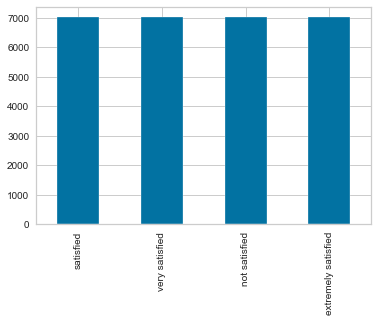

In [16]:
X_sm, y_sm = sm.fit_sample(X_sm, y_sm.ravel())
pd.Series(y_sm).value_counts().plot.bar()

In [17]:
def score_model(X, y, estimator, **kwargs):

    y = LabelEncoder().fit_transform(y)

    model = Pipeline([
         ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore')), 
         ('estimator', estimator)
    ])

    model.fit(X_train, y_train, **kwargs)  
    
    expected  = y_test
    predicted = model.predict(X_test)
    
    # Compute and return F1 (harmonic mean of precision and recall)
    print("{}: {}".format(estimator.__class__.__name__, f1_score(expected, predicted, average='micro')))

In [18]:
models = [
    SVC(), NuSVC(), LinearSVC(), 
    SGDClassifier(), KNeighborsClassifier(), 
    LogisticRegression(), 
    #aggingClassifier(), 
    ExtraTreesClassifier(n_estimators=100), 
    RandomForestClassifier(n_estimators=100),
    GradientBoostingClassifier(n_estimators=100,learning_rate=.3)
    #learning_rate=.5,max_depth=4, min_samples_leaf=75
]

for model in models:
    score_model(X_sm, y_sm, model)

SVC: 0.37021382396817504
NuSVC: 0.3433615116857285
LinearSVC: 0.33814022874191946
SGDClassifier: 0.342864246643461
KNeighborsClassifier: 0.32222774738935855


/Users/lisahuynh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression: 0.347090999502735
ExtraTreesClassifier: 0.364992541024366
RandomForestClassifier: 0.3679761312779712
GradientBoostingClassifier: 0.3562904027846842


## GridSearchCV

In [16]:
RandomForestClassifier().get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [24]:
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier()

# TODO:  Create a dictionary with the Ridge parameter options
parameters = {#'bootstrap': [True,False],
              #'ccp_alpha': [0.0],
              #'class_weight': [None],
              #'criterion': ['gini','entropy'],
              #'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
              'max_features': ['auto','sqrt', 'log2'],
              #'max_leaf_nodes': [None],
              #'max_samples': [None],
              #'min_impurity_split': [None],
              'min_samples_leaf': [1, 2, 4],
              #'min_samples_split': [2, 5, 10],
              #'min_weight_fraction_leaf': [0.0],
              'n_estimators': [50,100,200],
              #'n_jobs': [None],
              #'oob_score': [True, False],
              'random_state': [None,42,53]}
              #'verbose': [0],
              #'warm_start': [True, False]}

clf = GridSearchCV(model, parameters, cv = 3, verbose = 1, 
                      n_jobs = -1)
clf.fit(X_train, y_train)

print('If we change our parameters to: {}'.format(clf.best_params_))

If we change our parameters to: {'max_features': 'auto', 'min_samples_leaf': 4, 'n_estimators': 200, 'random_state': 42}


In [ ]:
region=widgets.Dropdown(value='OMB13CBSA',style=style, description="Region",disabled=False,
                    options=[("Atlanta-Sandy Springs-Roswell, GA",'12060'),
                            ("Baltimore-Columbia-Towson, MD",'12580'),
                            ('Birmingham-Hoover, AL','13820'),
                            ('Boston-Cambridge-Newton, MA-NH','14460'),
                            ('Chicago-Naperville-Elgin, IL-IN-WI','16980'),
                            ('Cincinnati, OH-KY-IN','17140'),
                            ('Cleveland-Elyria, OH','17460'),
                            ('Dallas-Fort Worth-Arlington, TX', '19100'),
                            ('Denver-Aurora-Lakewood, CO','19740'),
                            ('Detroit-Warren-Dearborn, MI','19820'),
                            ('Houston-The Woodlands-Sugar Land, TX','26420'),
                            ('Kansas City, MO-KS','28140'),
                            ('Las Vegas-Henderson-Paradise, NV','29820'),
                            ('Los Angeles-Long Beach-Anaheim, CA','31080'),
                            ('Memphis, TN-MS-AR','32820'),
                            ('Miami-Fort Lauderdale-West Palm Beach, FL','33100'),
                            ('Milwaukee-Waukesha-West Allis, WI','33340'),
                            ('Minneapolis-St. Paul-Bloomington, MN-WI','33460'),
                            ('New Orleans-Metairie, LA','35380'),
                            ('New York-Newark-Jersey City, NY-NJ-PA','35620'),
                            ('Oklahoma City, OK','36420'),
                            ('Philadelphia-Camden-Wilmington, PA-NJ-DE-MD','37980'),
                            ('Phoenix-Mesa-Scottsdale, AZ', '38060'),
                            ('Pittsburgh, PA','38300'),
                            ('Portland-Vancouver-Hillsboro, OR-WA','38900'),
                            ('Raleigh, NC','40060'),
                            ('Richmond, VA','39580'),
                            ('Riverside-San Bernardino-Ontario, CA','40140'),
                            ('Rochester, NY','40380'),
                            ('San Antonio-New Braunfels, TX','41700'),
                            ('San Francisco-Oakland-Hayward, CA','41860'),
                            ('San Jose-Sunnyvale-Santa Clara, CA','41940'),
                            ('Seattle-Tacoma-Bellevue, WA','42660'),
                            ('Tampa-St. Petersburg-Clearwater, FL','45300'),
                            ('Seattle-Tacoma-Bellevue, WA','47900'),
                            ('Washington-Arlington-Alexandria, DC-VA-MD-WV','42660'),
                            ('All other metropolitan areas','99998'),
                            ('Not in a metropolitan area','99999')])
